In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics.pairwise import cosine_similarity


In [16]:
rs = 17415538

In [17]:
#q9

In [18]:
df_star = pd.read_csv('starRatings.csv',header=None)
df_data = pd.read_csv('spotify52kData.csv')

In [19]:
popularity5k = df_data.loc[0:4999,'popularity']
popularity5k

0       73
1       55
2       57
3       71
4       82
        ..
4995    49
4996    55
4997    50
4998    24
4999    26
Name: popularity, Length: 5000, dtype: int64

In [20]:
average_ratings5k = df_star.mean(axis=0)
average_ratings5k

0       3.196939
1       1.361029
2       2.186377
3       1.576998
4       3.038835
          ...   
4995    0.833843
4996    2.368473
4997    0.914201
4998    0.890088
4999    0.795043
Length: 5000, dtype: float64

In [21]:
pearson_corr, _ = pearsonr(popularity5k, average_ratings5k)
print("Pearson Correlation: ", pearson_corr)

spearman_corr, _ = spearmanr(popularity5k, average_ratings5k)
print("Spearman Correlation: ", spearman_corr)

Pearson Correlation:  0.5693914205195114
Spearman Correlation:  0.543458638456252


0.016460503477264687 1.4355215764900702


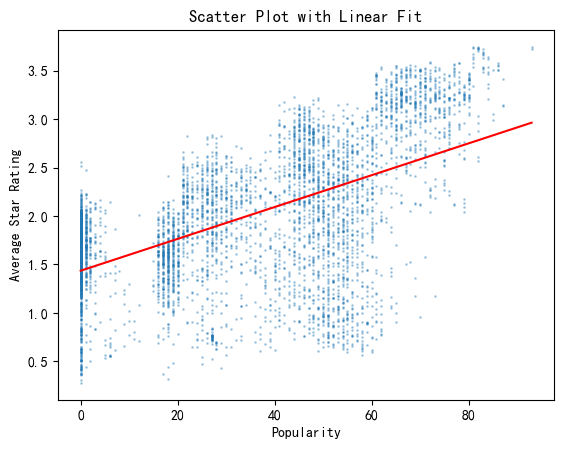

In [22]:
plt.scatter(popularity5k, average_ratings5k, s =1,alpha=0.3)

m, b = np.polyfit(popularity5k, average_ratings5k, 1)
print(m,b)
x=np.linspace(np.min(popularity5k),np.max(popularity5k),1000)
plt.plot(x, m*x + b, color='red')



plt.title('Scatter Plot with Linear Fit')
plt.xlabel('Popularity')
plt.ylabel('Average Star Rating')
plt.show()

In [23]:
top_10_indices = average_ratings5k.nlargest(10).index
top_10_indices


Index([3877, 3003, 2260, 2562, 3216, 2105, 2003, 2011, 3464, 3253], dtype='int64')

In [24]:
top_10_movies = df_data.loc[top_10_indices]['track_name']

top_10_movies

3877                         You're Gonna Go Far, Kid
3003                                  Sweater Weather
2260                                       Can't Stop
2562                         You're Gonna Go Far, Kid
3216                                  Californication
2105                                  Californication
2003                                  Sweater Weather
2011                                Shut Up and Dance
3464                                       Can't Stop
3253    New Gold (feat. Tame Impala and Bootie Brown)
Name: track_name, dtype: object

In [25]:
df_star.to_numpy()
num=df_star.count().sum()
num

4996173

In [26]:
#10

In [27]:


# Data Preparation
# Rating matrix R
# Example rating matrix
# R = np.array([[4, 0, 2, 0, 1],
#              [0, 2, 3, 0, 0],
#              [1, 0, 2, 4, 0],
#               [5, 0, 0, 3, 1],
#              [0, 0, 1, 5, 1],
#              [0, 3, 2, 4, 1]])

R = df_star.to_numpy()
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_data[features]  # The features you mentioned

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
'''
Input Parameters:
R: M×N rating matrix
K: Dimension of latent feature vectors
max_iter: Maximum number of iterations
alpha: Learning rate
lamda: Regularization coefficient

Output:
Decomposed P, Q
P: User feature matrix M*K
Q: Item feature matrix N*K

'''

# Set hyperparameters
K = 15 # Dimension set to 15
max_iter =  10
alpha = 0.001
lamda = 0.004
np.random.seed(rs)
# Core Algorithm
def lfm_grad_desc(R, max_iter, lamda, K, alpha):
    # Define basic dimension parameters
    M = len(R)
    N = len(R[0])
    # Initial values of P and Q
    P = np.random.rand(M,K)
    Q = np.random.rand(N,K)
    Q = Q.T  # Transpose of Q matrix

    # Start iterations
    for step in range(max_iter):
        # Iterate over all users u and items i, perform gradient descent on the corresponding feature vectors Pu and Qi
        for u in range(M):
            for i in range(N):
                # For rated items, calculate the prediction rating error
                if R[u][i] > 0:
                    eui = np.dot(P[u,:], Q[:,i]) - R[u][i]  # Rating error
                    # Incorporate into the formula, apply gradient descent algorithm to update the current Pu and Qi
                    for k in range(K):
                        P[u][k] = P[u][k] - alpha  * (2 * eui * Q[k][i] + 2 * lamda * P[u][k])
                        Q[k][i] = Q[k][i] - alpha  * (2 * eui * P[u][k] + 2 * lamda * Q[k][i])
        # After iterating through u and i, all feature vectors are updated, we can get P, Q, and can calculate the predicted rating matrix
        predR = np.dot(P, Q)

        # Calculate the current loss function
        cost = 0
        for u in range(M):
            for i in range(N):
                if R[u][i] > 0:
                    cost += (np.dot(P[u,:], Q[:,i]) - R[u][i]) ** 2
                    # Add regularization term
                    for k in range(K):
                        cost += lamda * (P[u][k] ** 2 + Q[k][i] ** 2)

        if step > 1 and (cost_old - cost) / cost < 0.001:
            break
        cost_old = cost
        print(f'{step}, {cost}')
    return P, Q.T, cost

P, Q, cost = lfm_grad_desc(R, max_iter, lamda, K, alpha)



0, 4993414.713521106
1, 4048387.8755131667
2, 3886549.8758612466
3, 3840029.7295093583
4, 3808104.0340120606
5, 3785244.816777943
6, 3767685.181558179
7, 3753542.7726174337
8, 3741762.1001524087
9, 3731644.0630893377


In [28]:
predR = P.dot(Q.T)
file_path_int = "my_data_int.csv"
file_path = 'my_data.csv'
round_predR=np.round(predR).astype(int)
# Use numpy.savetxt() to save the array to a CSV file
np.savetxt(file_path_int, round_predR, delimiter=',', fmt='%d')
np.savetxt(file_path, predR, delimiter=',', fmt='%.2f')

In [29]:
predR

array([[2.96957446, 1.86678248, 2.39005761, ..., 1.89171391, 1.59283817,
        1.62305883],
       [3.42972689, 2.11651383, 2.87420722, ..., 2.1095032 , 1.68168903,
        2.04915432],
       [3.57447164, 2.67750094, 2.90000887, ..., 2.3804437 , 2.06931595,
        2.31871064],
       ...,
       [3.85686353, 2.41537368, 2.91582107, ..., 2.44710223, 1.84864934,
        2.11936595],
       [3.09314825, 1.89462538, 2.15657163, ..., 1.89577814, 1.64384309,
        1.24741815],
       [3.48680883, 2.16301401, 2.72744228, ..., 2.33699204, 1.54913259,
        1.66247888]])

In [30]:
features = ['duration', 'danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
X = df_data.iloc[0:5000,:][features]  # The features you mentioned

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# X_pca 现在是转换后的数据，只包含前 7 个主成分
X_pca



array([[-1.48655762,  1.15483042,  1.05994236, ...,  0.43746144,
         0.31110251,  0.24643753],
       [ 2.32917815,  1.40950095,  0.27073872, ..., -0.62777957,
         1.35298915,  0.34043879],
       [ 0.83728502,  0.00982894, -0.17915592, ..., -0.78254041,
         1.60284716, -0.49290573],
       ...,
       [ 4.77053972, -0.83195335, -0.03295842, ...,  1.41054901,
        -0.19029092, -0.21094476],
       [ 4.27524246, -4.26829439, -1.08056839, ...,  3.6858897 ,
         0.72621487,  0.32739174],
       [ 4.50377632, -1.29477874, -0.06392364, ...,  1.08646831,
         0.14596831, -0.62620764]])

In [31]:
cosine_similarity_matrix = cosine_similarity(X_pca)
np.min(cosine_similarity_matrix[0])

-0.8449751786674029

In [32]:
import time
def integrate_lfm_content(R, predR,cosine_similarity_matrix, alpha=0.6):
    M, N = R.shape
    final_predR = np.zeros_like(predR)
    start=time.time()
    for u in range(M):
        rated_indices = np.where(~np.isnan(R[u]))[0]
        unrated_indices = np.where(np.isnan(R[u]))[0]
        for i in range(N):
            # LFM预测分数
            lfm_score = predR[u, i]
            
            # 基于内容的分数（平均相似度）
            #if np.isnan(R[u,i]):  # 只对用户未评分的物品进行计算
            similarities = cosine_similarity_matrix[i, rated_indices]
            similarities[similarities<0]=-0.05
            softmax_scores = similarities/ np.sum(similarities, axis=0)
            user_ratings = R[u, rated_indices]
            content_score = np.dot(softmax_scores, user_ratings)
            final_predR[u, i] = alpha * lfm_score + (1 - alpha) * content_score
            #else:
               # final_predR[u, i] = R[u,i]
        if u%1000==0:
            end=time.time()
            print(f'the time of {u} rows is {end-start}')
            start=time.time()
    return final_predR


final_predR = integrate_lfm_content(R, predR, cosine_similarity_matrix)



the time of 0 rows is 0.08762884140014648
the time of 1000 rows is 46.49548292160034
the time of 2000 rows is 46.61599779129028
the time of 3000 rows is 46.85872793197632
the time of 4000 rows is 46.832786083221436
the time of 5000 rows is 47.58178091049194
the time of 6000 rows is 46.96205806732178
the time of 7000 rows is 47.25167274475098
the time of 8000 rows is 47.08986282348633
the time of 9000 rows is 47.04641795158386


In [33]:
final_predR.shape

(10000, 5000)

In [34]:
final_predR

array([[2.47931424, 1.48105653, 1.98495909, ..., 1.38241796, 1.27316111,
        1.23839887],
       [3.14182006, 2.06774625, 2.68252961, ..., 1.91900878, 1.77606438,
        1.89556194],
       [3.28294279, 2.63004491, 2.80848717, ..., 2.38435639, 2.1937544 ,
        2.34919693],
       ...,
       [3.46497712, 2.41689572, 2.85058006, ..., 2.38613869, 2.12259951,
        2.20386032],
       [2.72525336, 1.524597  , 1.93260689, ..., 1.4506937 , 1.45684109,
        1.08437904],
       [3.11477882, 2.12541289, 2.61655276, ..., 2.15785929, 1.75144939,
        1.76498255]])

In [35]:
import pandas as pd

# 假设 df 是您的DataFrame
duplicates = df_data.duplicated()

# 检查是否有重复行
has_duplicates = duplicates.any()
print(f"DataFrame中有重复行: {has_duplicates}")


DataFrame中有重复行: False


In [36]:
df_data.shape

(52000, 20)

In [37]:

# 假设 final_predR 是您的评分矩阵，df_data 是您的歌曲DataFrame
num_users = final_predR.shape[0]
top_n = 10  # 每个用户前10首歌曲

# 存储每个用户的前10首歌曲的索引
top_songs_indices = np.argsort(-final_predR, axis=1)[:, :top_n]

# 创建一个空的DataFrame来存储结果
top_songs_df_index = pd.DataFrame(index=range(num_users), columns=range(top_n))

# 遍历每个用户
for user in range(num_users):
    # 获取每个用户的前10首歌曲的songNumber和track_name
    top_songs_df_index.iloc[user] = df_data.loc[top_songs_indices[user], 'songNumber']

# 输出结果
top_songs_df_index


,0,1,2,3,4,5,6,7,8,9
0,2011,3256,3003,3972,2105,3253,2562,3011,3007,3806
1,2011,2105,2562,2003,3950,3216,3003,2054,3253,2615
2,3877,3216,2260,2562,2003,3059,3464,2011,3007,2105
3,3201,2011,3007,3569,3003,3257,3158,3059,2618,2900
4,3003,3877,3253,3158,3201,2011,3971,3454,2562,2260
...,...,...,...,...,...,...,...,...,...,...
9995,3007,3003,2416,3454,2800,3870,3754,3201,3971,3759
9996,2370,2011,3253,3007,3403,2054,2954,2615,2562,3967
9997,3003,2906,3972,3967,3877,2003,2260,2011,3007,3253
9998,3253,3007,3158,2615,2770,3217,2003,2457,3003,3464


In [40]:
final_predR[1,top_songs_indices[1]]


array([3.61886097, 3.60845703, 3.60605984, 3.58119858, 3.58003893,
       3.57725368, 3.5542209 , 3.55400577, 3.55236432, 3.52794624])

In [41]:
top_songs_matrix = top_songs_df_index.to_numpy()

In [42]:
import numpy as np

def average_precision(recommended, relevant):
    """计算单个用户的平均精度（AP）"""
    hit = 0
    sum_precision = 0
    for i, item in enumerate(recommended):
        if item in relevant:
            hit += 1
            sum_precision += hit / (i + 1)
    return sum_precision / len(relevant) if relevant else 0

def mean_average_precision(recommendation_matrix, relevant_items):
    """计算所有用户的平均精度均值（MAP）"""
    num_users = recommendation_matrix.shape[0]
    aps = []
    for user_id in range(num_users):
        recommended = recommendation_matrix[user_id, :]
        ap = average_precision(recommended, relevant_items)
        aps.append(ap)
    return np.mean(aps)

# 假设 recommendation_matrix 是一个 numpy array，每行包含一个用户的推荐列表
# greatest_hits 是相关项目（即“最受欢迎歌曲”）的列表
greatest_hits = [3877, 3003, 2260, 2562, 3216, 2105, 2003, 2011, 3464, 3253]

map_score = mean_average_precision(top_songs_matrix, greatest_hits)

print(f'MAP: {map_score}')


MAP: 0.3636485238095238
